In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
LATENT_DIM = 64
p = np.array([0.2, 0.1, 0.05, 0.05, 0.3, 0.02, 0.08, 0.15, 0.04, 0.01])
categories = list(range(len(p)))

SIMULATION_ITERS = 10_000

In [3]:
def generate_indices():
    return [np.random.choice(categories, p=p) for _ in range(LATENT_DIM)]

In [4]:
def simulate():
    return np.array([generate_indices() for _ in range(SIMULATION_ITERS)]).T

In [5]:
buffer = simulate()
print(buffer.shape)
print(buffer)

(64, 10000)
[[1 4 4 ... 7 0 0]
 [0 2 7 ... 4 0 6]
 [6 0 7 ... 4 4 6]
 ...
 [0 0 9 ... 2 6 4]
 [0 6 4 ... 7 8 3]
 [7 4 0 ... 0 1 0]]


In [6]:
def hist_1d(arr):
    return np.array([(arr == c).sum() for c in categories])

counts = np.apply_along_axis(hist_1d, axis=1, arr=buffer)

In [7]:
empirical_probabilities = counts / counts.sum(axis=-1).reshape(-1, 1)
empirical_probabilities

array([[0.1962, 0.0931, 0.051 , 0.0498, 0.2983, 0.0186, 0.0834, 0.1595,
        0.0392, 0.0109],
       [0.1971, 0.0996, 0.0519, 0.0496, 0.2991, 0.0196, 0.0823, 0.1541,
        0.0364, 0.0103],
       [0.1961, 0.1045, 0.0472, 0.0509, 0.2995, 0.0197, 0.0808, 0.1523,
        0.0395, 0.0095],
       [0.2082, 0.1007, 0.0523, 0.0455, 0.2923, 0.0219, 0.0836, 0.1461,
        0.0394, 0.01  ],
       [0.2019, 0.0973, 0.0456, 0.0507, 0.3031, 0.0179, 0.0842, 0.1467,
        0.0412, 0.0114],
       [0.1976, 0.0951, 0.0505, 0.0527, 0.2976, 0.0205, 0.0822, 0.1517,
        0.0428, 0.0093],
       [0.202 , 0.1016, 0.0477, 0.052 , 0.298 , 0.0188, 0.0773, 0.1542,
        0.0369, 0.0115],
       [0.1977, 0.0999, 0.051 , 0.0528, 0.2961, 0.0219, 0.0774, 0.1507,
        0.0434, 0.0091],
       [0.203 , 0.1003, 0.0514, 0.0481, 0.3047, 0.0226, 0.0754, 0.1484,
        0.0358, 0.0103],
       [0.1928, 0.1018, 0.05  , 0.0514, 0.303 , 0.0188, 0.0796, 0.1522,
        0.0407, 0.0097],
       [0.1982, 0.0998, 0.0494

In [8]:
p

array([0.2 , 0.1 , 0.05, 0.05, 0.3 , 0.02, 0.08, 0.15, 0.04, 0.01])

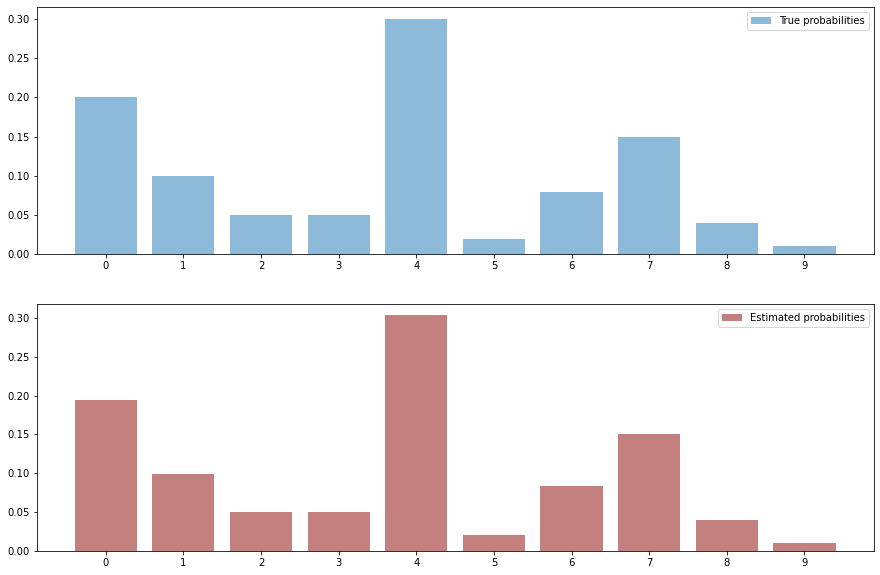

In [12]:
rand_idx = np.random.randint(empirical_probabilities.shape[0])
sample = empirical_probabilities[rand_idx]

fig, axs = plt.subplots(2, 1)
fig.set_size_inches(15, 10)

axs[0].bar(categories, height=p, alpha=0.5, label="True probabilities")
axs[0].legend()
axs[0].set_xticks(categories)

axs[1].bar(categories, height=sample, alpha=0.5, label="Estimated probabilities", color='darkred')
axs[1].legend()
axs[1].set_xticks(categories)

plt.show()